In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('/home/quangminh/Documents/code/Python/ProjectDS/laptop-price-prediction-ds-prj/train_processed.csv')

In [3]:
X = data.drop('laptop_specs_price', axis=1)
y = data['laptop_specs_price']

In [4]:
X.count()

laptop_specs_brand                    2500
laptop_specs_ram_amount               2500
laptop_specs_ram_type                 2500
laptop_specs_storage_amount           2500
laptop_specs_storage_type             2500
laptop_specs_webcam_resolution        2500
laptop_specs_screen_size              2500
laptop_specs_screen_refresh_rate      2500
laptop_specs_screen_brightness        2500
laptop_specs_battery_capacity         2500
laptop_specs_battery_cells            2500
laptop_specs_weight                   2500
laptop_specs_default_os               2500
laptop_specs_warranty                 2500
laptop_specs_width                    2500
laptop_specs_depth                    2500
laptop_specs_height                   2500
laptop_specs_number_usb_a_ports       2500
laptop_specs_number_usb_c_ports       2500
laptop_specs_number_hdmi_ports        2500
laptop_specs_number_ethernet_ports    2500
laptop_specs_number_audio_jacks       2500
cpu_specs_multithread_rating          2500
cpu_specs_s

In [5]:
print(X['laptop_specs_ram_amount'].value_counts())

laptop_specs_ram_amount
16.0     1343
8.0       700
32.0      258
24.0       50
4.0        34
12.0       31
64.0       22
36.0       22
512.0      15
48.0       10
18.0        8
96.0        4
128.0       3
Name: count, dtype: int64


In [6]:
categories = {
    4.0: 0,
    8.0: 1,
    12.0: 2,
    16.0: 4,
    18.0: 5,
    24.0: 6,
    32.0: 7,
    48.0: 8,
    96.0: 9,
}

# Encode the column using the hashmap
def encode_with_nearest(value):
    if value in categories:
        return categories[value]
    else:
        nearest_key = min(categories.keys(), key=lambda k: abs(k - value))
        return categories[nearest_key]

test = X['laptop_specs_ram_amount'].apply(encode_with_nearest)


In [7]:
print(test.value_counts())

laptop_specs_ram_amount
4    1343
1     700
7     280
6      50
0      34
8      32
2      31
9      22
5       8
Name: count, dtype: int64


In [8]:
X['laptop_specs_storage_amount'].value_counts()

laptop_specs_storage_amount
512.0     1551
1024.0     431
256.0      185
16.0       164
2048.0      53
8.0         40
32.0        32
36.0        11
24.0         8
18.0         8
48.0         5
4096.0       3
8192.0       3
12.0         3
64.0         2
4.0          1
Name: count, dtype: int64

In [9]:
categories ={
    256.0: 0,
    512.0: 1,
    1024.0: 2,
    2048.0: 3
}
test2 = X['laptop_specs_storage_amount'].apply(encode_with_nearest)

In [10]:
test2.value_counts()

laptop_specs_storage_amount
1    1551
0     459
2     431
3      59
Name: count, dtype: int64

In [11]:
X['laptop_specs_warranty'].value_counts()

laptop_specs_warranty
12.0    1367
24.0    1026
36.0     105
18.0       2
Name: count, dtype: int64

In [12]:
categories = {
    12.0: 0, 
    18.0: 1,
    24.0: 2, 
    36.0: 3
}

test3 = X['laptop_specs_warranty'].apply(encode_with_nearest)

In [13]:
X['laptop_specs_screen_refresh_rate'].value_counts()

laptop_specs_screen_refresh_rate
144.0    629
60.0     594
120.0    529
90.0     262
180.0    230
165.0    129
240.0    120
250.0      5
360.0      2
Name: count, dtype: int64

In [14]:
categories = {
    60.0: 0, 
    90.0: 1,
    120.0: 2, 
    144.0: 3, 
    165.0: 4, 
    180.0: 5, 
    240.0: 6, 
    360.0:7
}

test4 = X['laptop_specs_screen_refresh_rate'].apply(encode_with_nearest)

In [15]:
test4.value_counts()

laptop_specs_screen_refresh_rate
3    629
0    594
2    529
1    262
5    230
4    129
6    125
7      2
Name: count, dtype: int64

In [16]:
X['laptop_specs_screen_brightness'].value_counts()

laptop_specs_screen_brightness
250.0     743
300.0     577
400.0     407
500.0     388
350.0     257
600.0      79
550.0      13
1000.0     11
430.0       7
220.0       5
1100.0      5
1200.0      3
380.0       2
439.0       1
512.0       1
288.0       1
Name: count, dtype: int64

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
test5 = pd.DataFrame(scaler.fit_transform(X['laptop_specs_screen_brightness'].to_frame()))

In [5]:
test5.value_counts()

0       
0.030612    743
0.081633    577
0.183673    407
0.285714    388
0.132653    257
0.387755     79
0.336735     13
0.795918     11
0.214286      7
0.897959      5
0.000000      5
1.000000      3
0.163265      2
0.069388      1
0.297959      1
0.223469      1
Name: count, dtype: int64

In [20]:
X['laptop_specs_screen_size'].value_counts()

laptop_specs_screen_size
15.60    928
14.00    655
16.00    366
13.60     96
13.30     92
14.20     73
16.10     69
15.30     50
16.20     48
14.50     26
18.00     25
13.00     20
17.00     17
13.40      8
17.30      7
13.50      4
14.10      3
15.00      2
13.33      1
14.84      1
16.63      1
14.55      1
16.50      1
13.14      1
16.97      1
15.70      1
11.60      1
15.02      1
13.67      1
Name: count, dtype: int64

In [21]:
test6 = X['laptop_specs_screen_size']/15.6
test6.value_counts()

laptop_specs_screen_size
1.000000    928
0.897436    655
1.025641    366
0.871795     96
0.852564     92
0.910256     73
1.032051     69
0.980769     50
1.038462     48
0.929487     26
1.153846     25
0.833333     20
1.089744     17
0.858974      8
1.108974      7
0.865385      4
0.903846      3
0.961538      2
0.854487      1
0.951282      1
1.066026      1
0.932692      1
1.057692      1
0.842308      1
1.087821      1
1.006410      1
0.743590      1
0.962821      1
0.876282      1
Name: count, dtype: int64

In [22]:
X['laptop_specs_battery_cells'].value_counts()

laptop_specs_battery_cells
3.0    1339
4.0    1108
6.0      40
2.0      13
Name: count, dtype: int64

In [23]:
test7 = X['laptop_specs_battery_cells']/3

In [24]:
X['laptop_specs_battery_capacity'].value_counts()

laptop_specs_battery_capacity
50.0    217
90.0    190
41.0    187
70.0    118
60.0    117
       ... 
69.5      1
82.0      1
61.0      1
42.3      1
40.2      1
Name: count, Length: 79, dtype: int64

In [25]:
scaler = MinMaxScaler() 
test8 = pd.DataFrame(scaler.fit_transform(X['laptop_specs_battery_capacity'].to_frame()))

In [26]:
test8.value_counts()

0       
0.222222    217
0.666667    190
0.122222    187
0.444444    118
0.333333    117
           ... 
0.438889      1
0.488889      1
0.577778      1
0.777556      1
1.000000      1
Name: count, Length: 79, dtype: int64

In [27]:
X['laptop_specs_number_audio_jacks'].value_counts()

laptop_specs_number_audio_jacks
0.0    1560
1.0     940
Name: count, dtype: int64

In [28]:
X['laptop_specs_number_ethernet_ports'].value_counts()

laptop_specs_number_ethernet_ports
0.0    2023
1.0     477
Name: count, dtype: int64

In [29]:
X['laptop_specs_number_hdmi_ports'].value_counts()

laptop_specs_number_hdmi_ports
1.0    2117
0.0     383
Name: count, dtype: int64

In [30]:
X['laptop_specs_number_usb_a_ports'].value_counts()

laptop_specs_number_usb_a_ports
0.0    1269
2.0     621
3.0     409
1.0     173
4.0      21
6.0       5
5.0       2
Name: count, dtype: int64

In [31]:
X['laptop_specs_number_usb_c_ports'].value_counts()

laptop_specs_number_usb_c_ports
1.0    1083
2.0     744
0.0     539
3.0     109
4.0      25
Name: count, dtype: int64

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler() 
test9 = pd.DataFrame((scaler.fit_transform(X['cpu_specs_multithread_rating'].to_frame())) + 0.1)

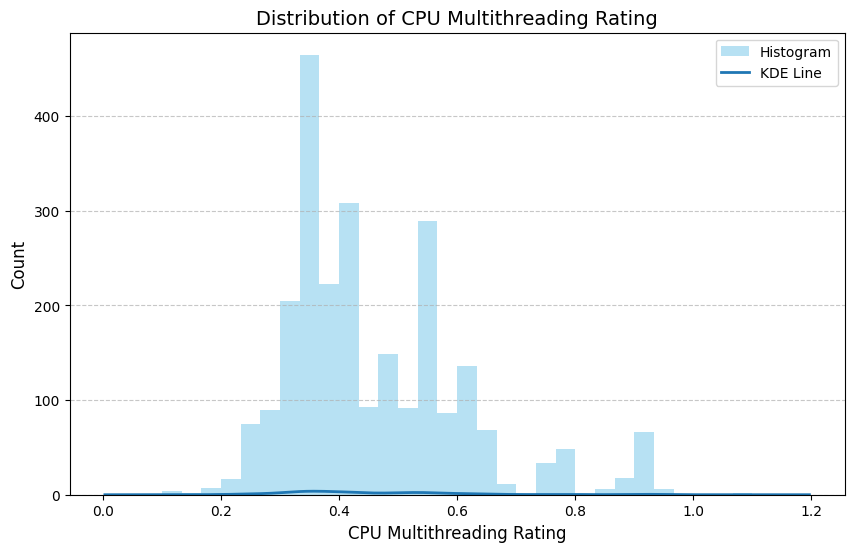

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(test9, bins=30, color='skyblue', alpha=0.6, label='Histogram')

# Add line distribution (Kernel Density Estimation)
sns.kdeplot(test9, color='red', linewidth=2, label='KDE Line')

# Add labels and title
plt.xlabel('CPU Multithreading Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of CPU Multithreading Rating', fontsize=14)
plt.legend()

# Display grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()



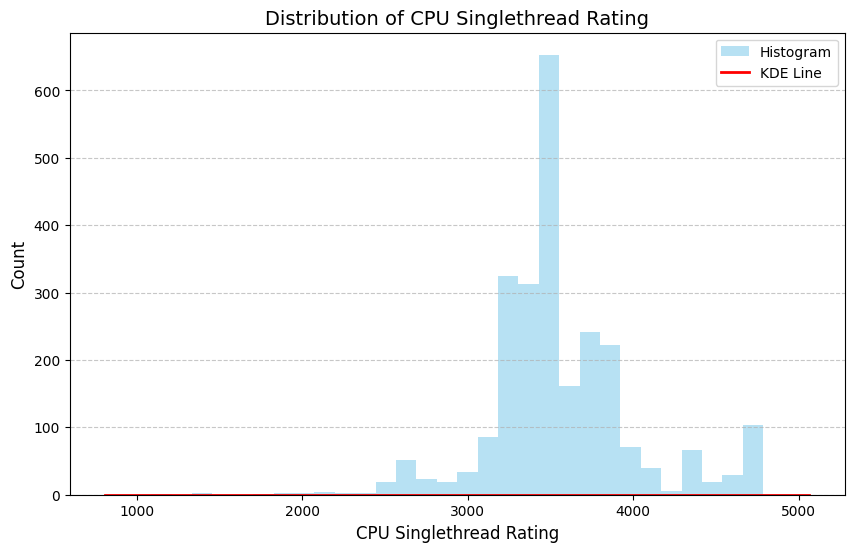

In [34]:
# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(X['cpu_specs_single_thread_rating'], bins=30, color='skyblue', alpha=0.6, label='Histogram')

# Add line distribution (Kernel Density Estimation)
sns.kdeplot(X['cpu_specs_single_thread_rating'], color='red', linewidth=2, label='KDE Line')

# Add labels and title
plt.xlabel('CPU Singlethread Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of CPU Singlethread Rating', fontsize=14)
plt.legend()

# Display grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [35]:
scaler = MinMaxScaler()
test10 = pd.DataFrame((scaler.fit_transform(X['cpu_specs_single_thread_rating'].to_frame())) + 0.1)

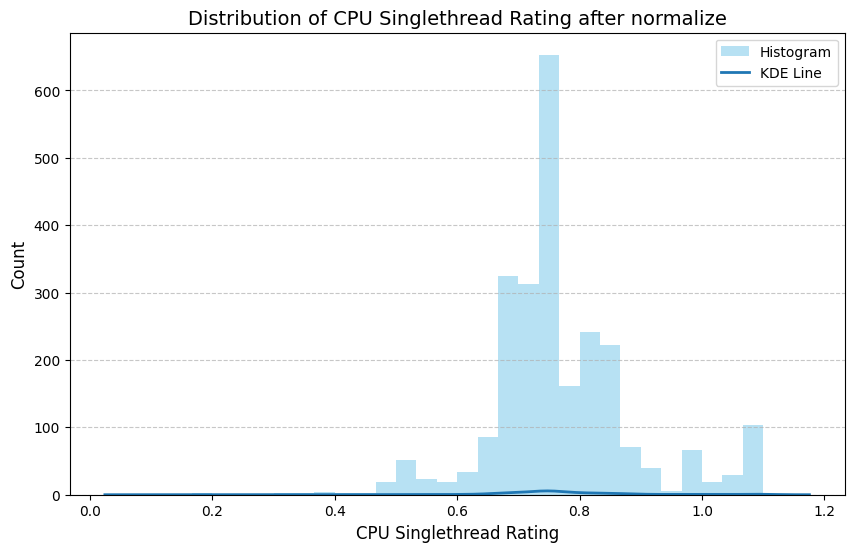

In [36]:
# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(test10, bins=30, color='skyblue', alpha=0.6, label='Histogram')

# Add line distribution (Kernel Density Estimation)
sns.kdeplot(test10, color='red', linewidth=2, label='KDE Line')

# Add labels and title
plt.xlabel('CPU Singlethread Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of CPU Singlethread Rating after normalize', fontsize=14)
plt.legend()

# Display grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

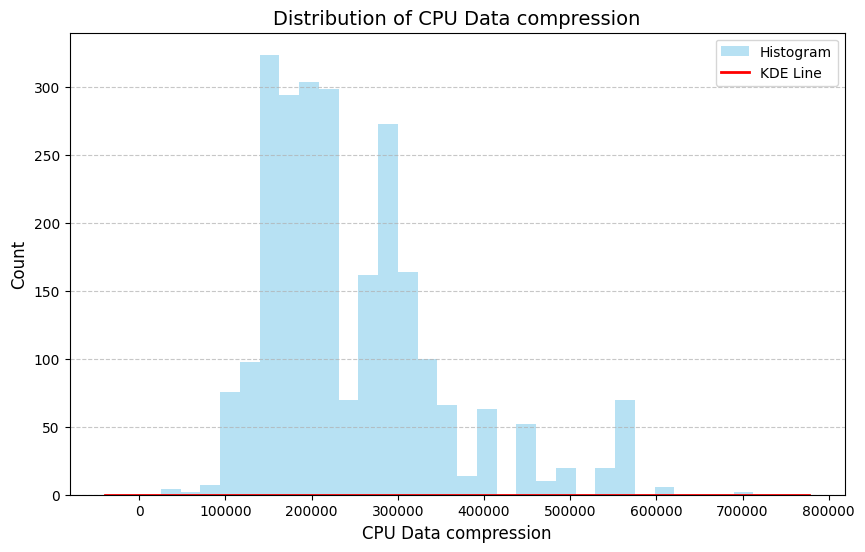

In [37]:
plt.figure(figsize=(10, 6))
plt.hist(X['cpu_specs_data_compression'], bins=30, color='skyblue', alpha=0.6, label='Histogram')

# Add line distribution (Kernel Density Estimation)
sns.kdeplot(X['cpu_specs_data_compression'], color='red', linewidth=2, label='KDE Line')

# Add labels and title
plt.xlabel('CPU Data compression', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of CPU Data compression', fontsize=14)
plt.legend()

# Display grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

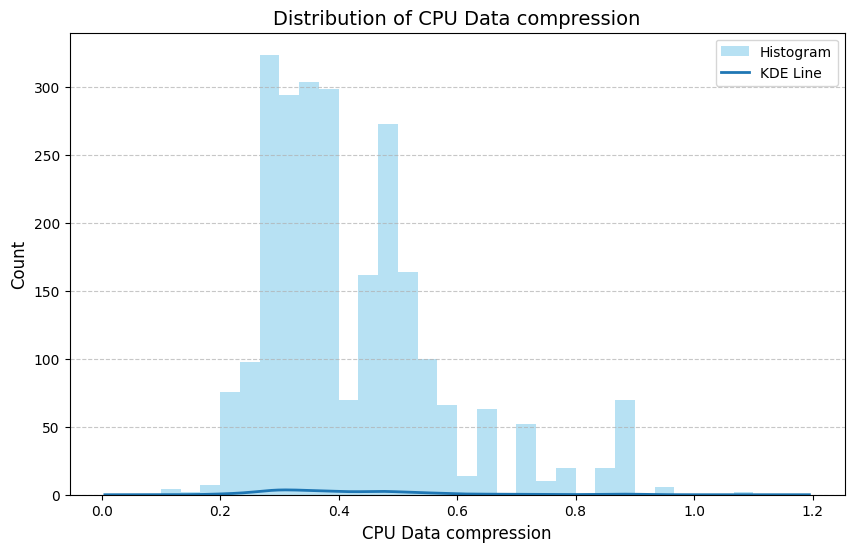

In [38]:
scaler = MinMaxScaler()
test11 = pd.DataFrame((scaler.fit_transform((X['cpu_specs_data_compression'].to_frame()))) + 0.1)

plt.figure(figsize=(10, 6))
plt.hist(test11, bins=30, color='skyblue', alpha=0.6, label='Histogram')

# Add line distribution (Kernel Density Estimation)
sns.kdeplot(test11, color='red', linewidth=2, label='KDE Line')

# Add labels and title
plt.xlabel('CPU Data compression', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of CPU Data compression', fontsize=14)
plt.legend()

# Display grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

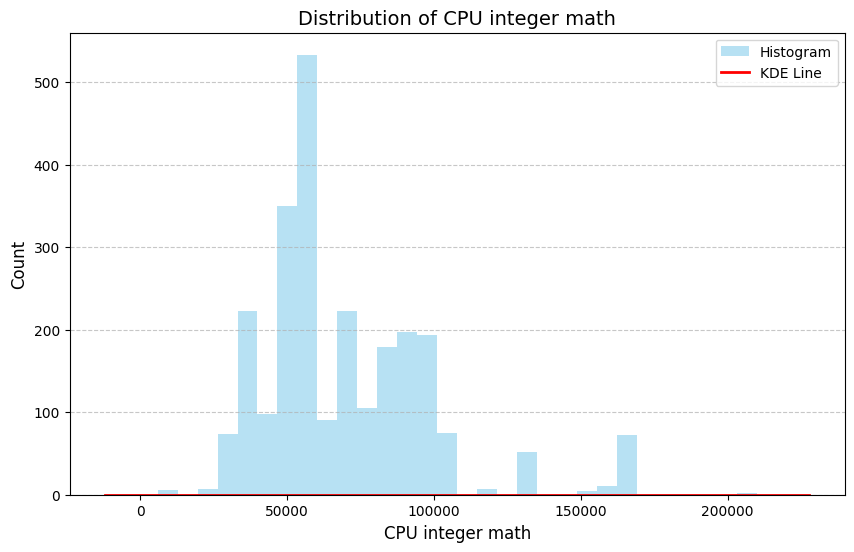

In [39]:
plt.figure(figsize=(10, 6))
plt.hist(X['cpu_specs_integer_math'], bins=30, color='skyblue', alpha=0.6, label='Histogram')

# Add line distribution (Kernel Density Estimation)
sns.kdeplot(X['cpu_specs_integer_math'], color='red', linewidth=2, label='KDE Line')

# Add labels and title
plt.xlabel('CPU integer math', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of CPU integer math', fontsize=14)
plt.legend()

# Display grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

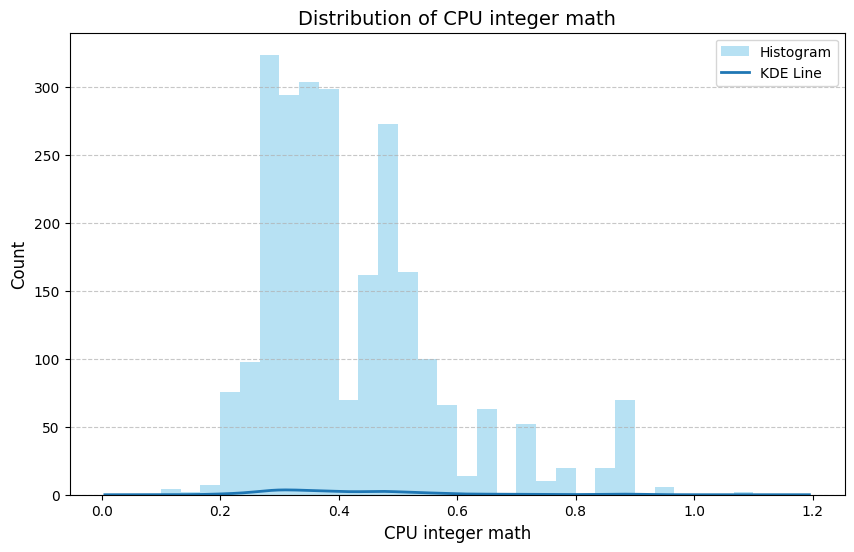

In [40]:
test12 = pd.DataFrame((scaler.fit_transform((X['cpu_specs_integer_math'].to_frame()))) + 0.1)

plt.figure(figsize=(10, 6))
plt.hist(test11, bins=30, color='skyblue', alpha=0.6, label='Histogram')

# Add line distribution (Kernel Density Estimation)
sns.kdeplot(test11, color='red', linewidth=2, label='KDE Line')

# Add labels and title
plt.xlabel('CPU integer math', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of CPU integer math', fontsize=14)
plt.legend()

# Display grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

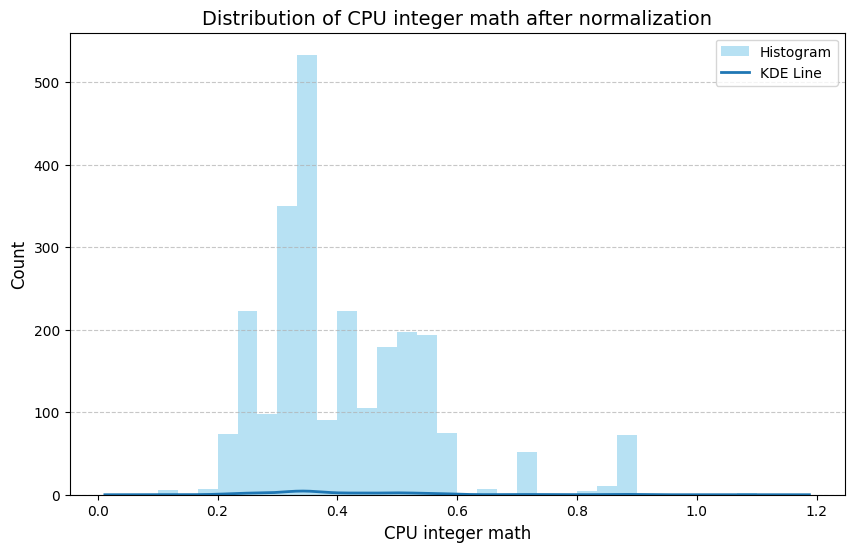

In [41]:
test13 = pd.DataFrame((scaler.fit_transform((X['cpu_specs_integer_math'].to_frame()))) + 0.1)

plt.figure(figsize=(10, 6))
plt.hist(test13, bins=30, color='skyblue', alpha=0.6, label='Histogram')

# Add line distribution (Kernel Density Estimation)
sns.kdeplot(test13, color='red', linewidth=2, label='KDE Line')

# Add labels and title
plt.xlabel('CPU integer math', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of CPU integer math after normalization', fontsize=14)
plt.legend()

# Display grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

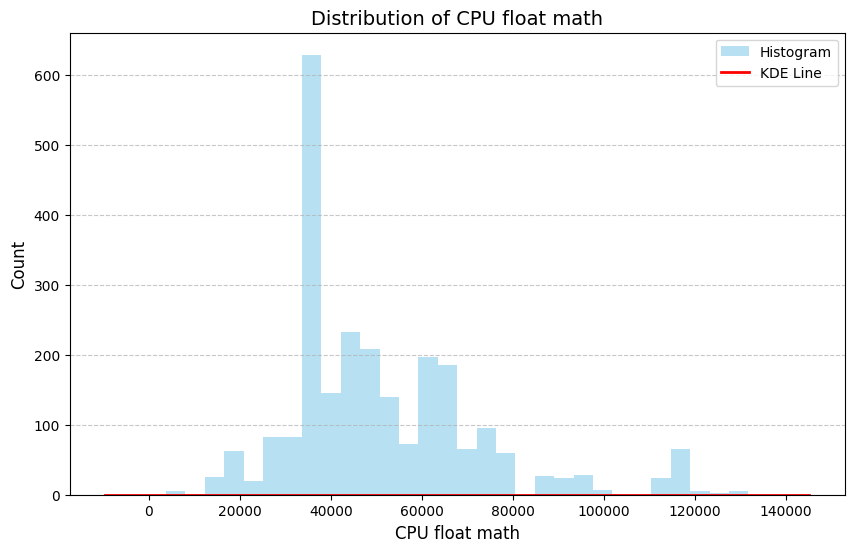

In [42]:
plt.figure(figsize=(10, 6))
plt.hist(X['cpu_specs_floating_point_math'], bins=30, color='skyblue', alpha=0.6, label='Histogram')

# Add line distribution (Kernel Density Estimation)
sns.kdeplot(X['cpu_specs_floating_point_math'], color='red', linewidth=2, label='KDE Line')

# Add labels and title
plt.xlabel('CPU float math', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of CPU float math', fontsize=14)
plt.legend()

# Display grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

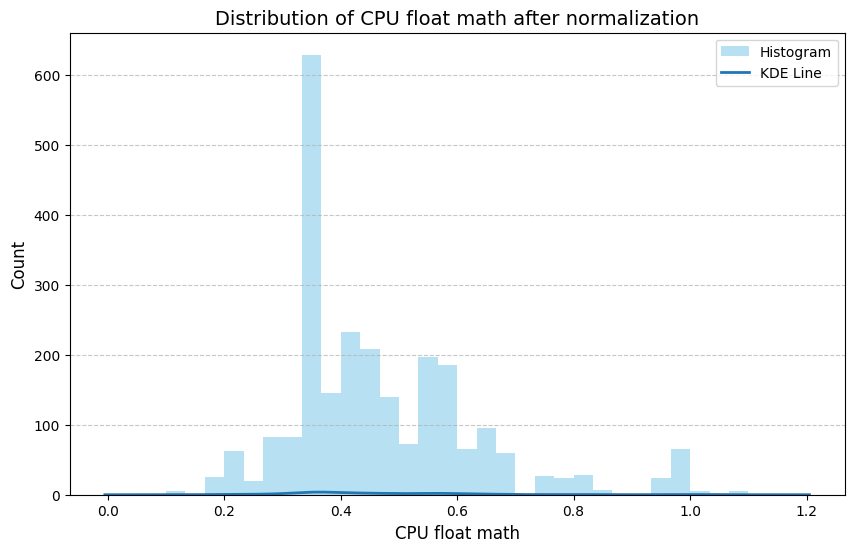

In [43]:
test14 = pd.DataFrame((scaler.fit_transform((X['cpu_specs_floating_point_math'].to_frame()))) + 0.1)

plt.figure(figsize=(10, 6))
plt.hist(test14, bins=30, color='skyblue', alpha=0.6, label='Histogram')

# Add line distribution (Kernel Density Estimation)
sns.kdeplot(test14, color='red', linewidth=2, label='KDE Line')

# Add labels and title
plt.xlabel('CPU float math', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of CPU float math after normalization', fontsize=14)
plt.legend()

# Display grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

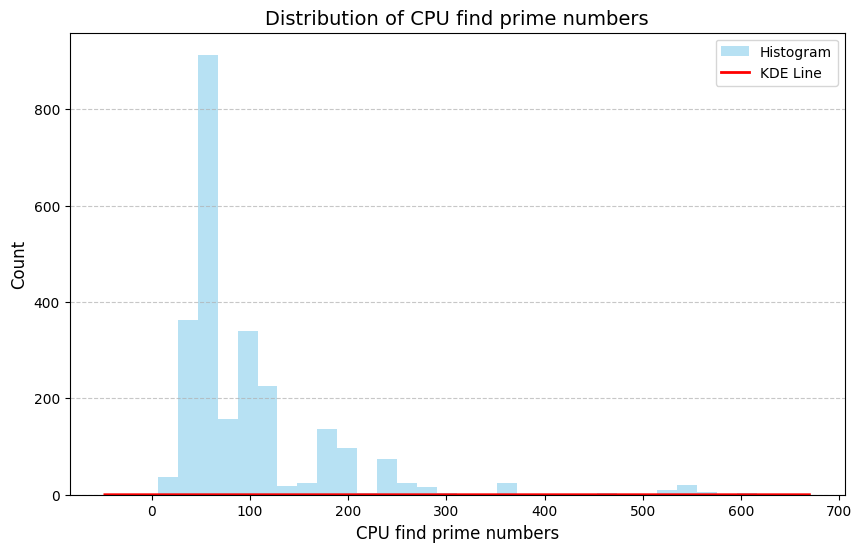

In [44]:
plt.figure(figsize=(10, 6))
plt.hist(X['cpu_specs_find_prime_numbers'], bins=30, color='skyblue', alpha=0.6, label='Histogram')

# Add line distribution (Kernel Density Estimation)
sns.kdeplot(X['cpu_specs_find_prime_numbers'], color='red', linewidth=2, label='KDE Line')

# Add labels and title
plt.xlabel('CPU find prime numbers', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of CPU find prime numbers', fontsize=14)
plt.legend()

# Display grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

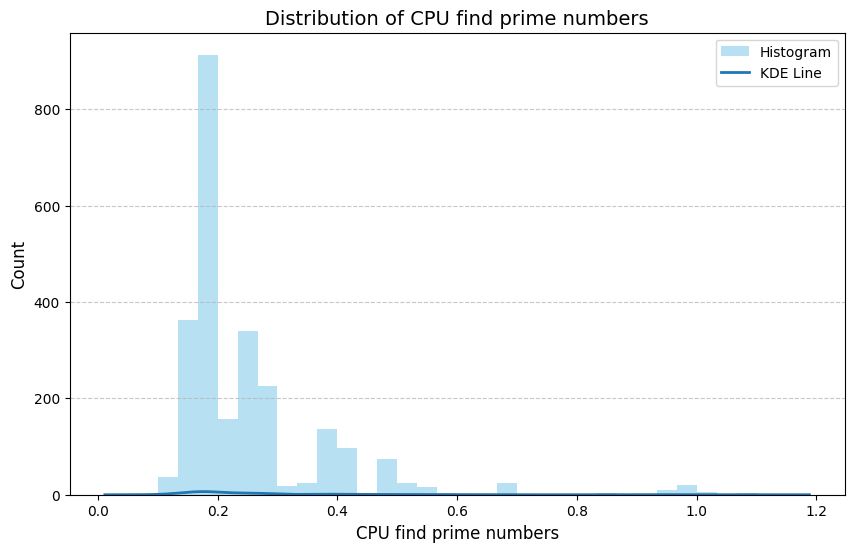

In [45]:
test15 = pd.DataFrame((scaler.fit_transform((X['cpu_specs_find_prime_numbers'].to_frame()))) + 0.1)
plt.figure(figsize=(10, 6))
plt.hist(test15, bins=30, color='skyblue', alpha=0.6, label='Histogram')

# Add line distribution (Kernel Density Estimation)
sns.kdeplot(test15, color='red', linewidth=2, label='KDE Line')

# Add labels and title
plt.xlabel('CPU find prime numbers', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of CPU find prime numbers', fontsize=14)
plt.legend()

# Display grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

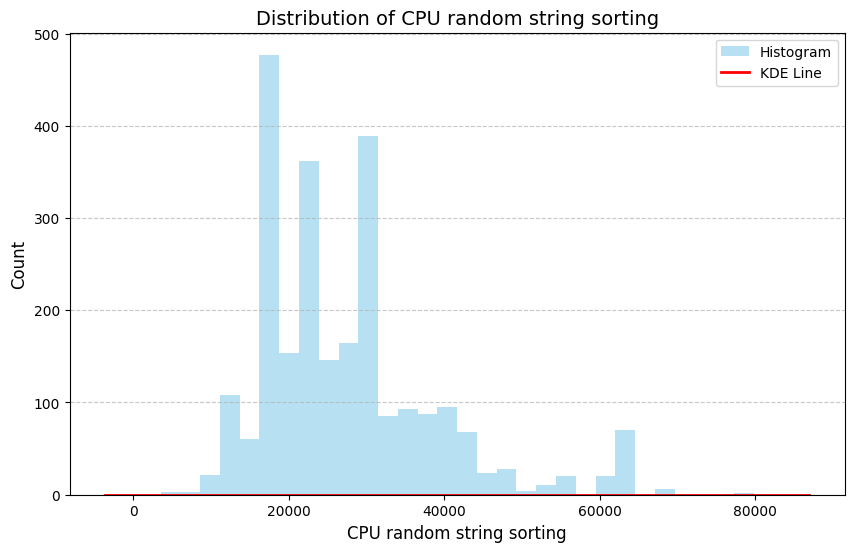

In [46]:
plt.figure(figsize=(10, 6))
plt.hist(X['cpu_specs_random_string_sorting'], bins=30, color='skyblue', alpha=0.6, label='Histogram')

# Add line distribution (Kernel Density Estimation)
sns.kdeplot(X['cpu_specs_random_string_sorting'], color='red', linewidth=2, label='KDE Line')

# Add labels and title
plt.xlabel('CPU random string sorting', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of CPU random string sorting', fontsize=14)
plt.legend()

# Display grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

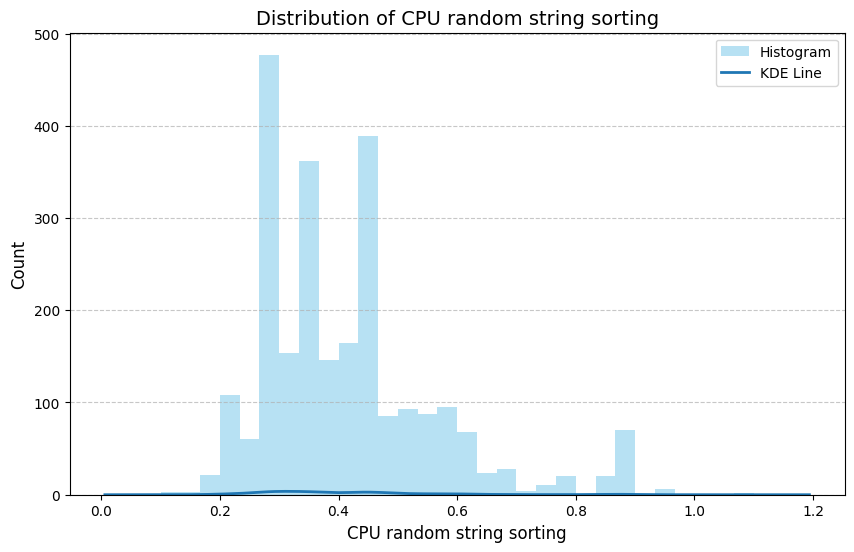

In [47]:
test16 = pd.DataFrame((scaler.fit_transform((X['cpu_specs_random_string_sorting'].to_frame()))) + 0.1)
plt.figure(figsize=(10, 6))
plt.hist(test16, bins=30, color='skyblue', alpha=0.6, label='Histogram')

# Add line distribution (Kernel Density Estimation)
sns.kdeplot(test16, color='red', linewidth=2, label='KDE Line')

# Add labels and title
plt.xlabel('CPU random string sorting', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of CPU random string sorting', fontsize=14)
plt.legend()

# Display grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

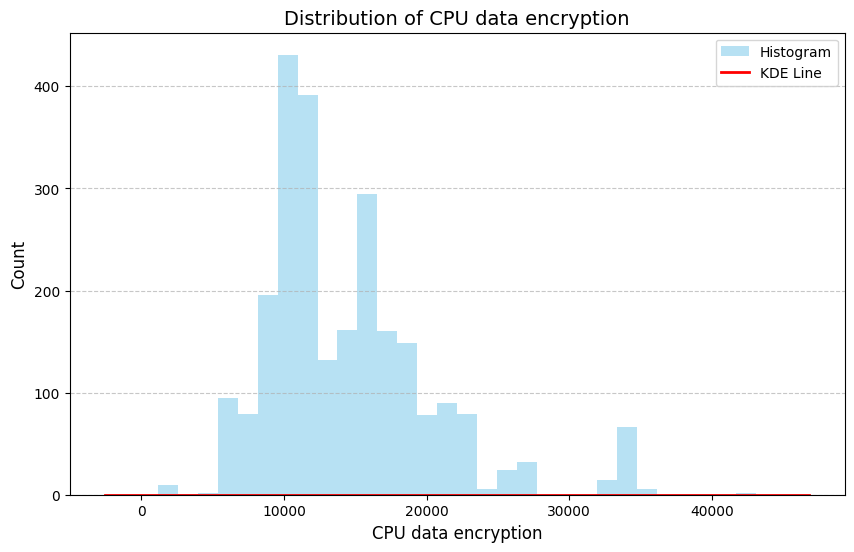

In [48]:
plt.figure(figsize=(10, 6))
plt.hist(X['cpu_specs_data_encryption'], bins=30, color='skyblue', alpha=0.6, label='Histogram')

# Add line distribution (Kernel Density Estimation)
sns.kdeplot(X['cpu_specs_data_encryption'], color='red', linewidth=2, label='KDE Line')

# Add labels and title
plt.xlabel('CPU data encryption', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of CPU data encryption', fontsize=14)
plt.legend()

# Display grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

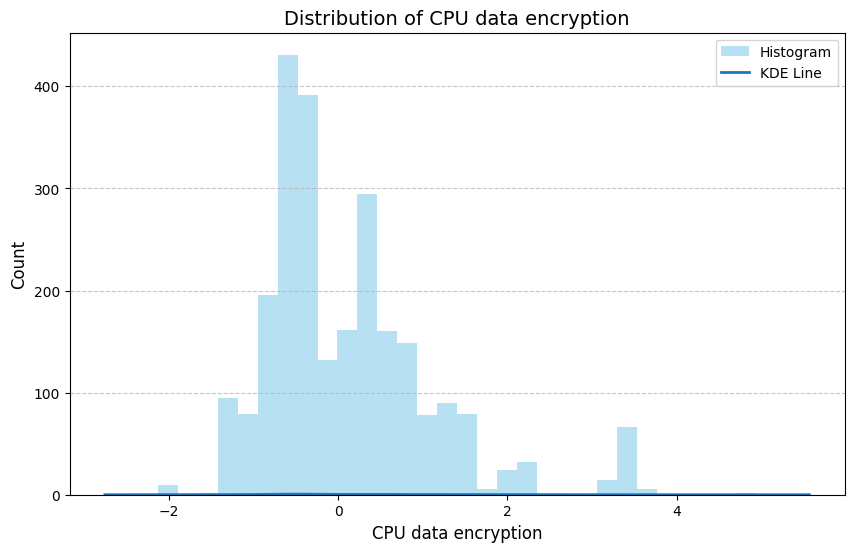

In [49]:
scaler = StandardScaler() 
test17 = pd.DataFrame((scaler.fit_transform((X['cpu_specs_data_encryption'].to_frame()))) + 0.1)
plt.figure(figsize=(10, 6))
plt.hist(test17, bins=30, color='skyblue', alpha=0.6, label='Histogram')

# Add line distribution (Kernel Density Estimation)
sns.kdeplot(test17, color='red', linewidth=2, label='KDE Line')

# Add labels and title
plt.xlabel('CPU data encryption', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of CPU data encryption', fontsize=14)
plt.legend()

# Display grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

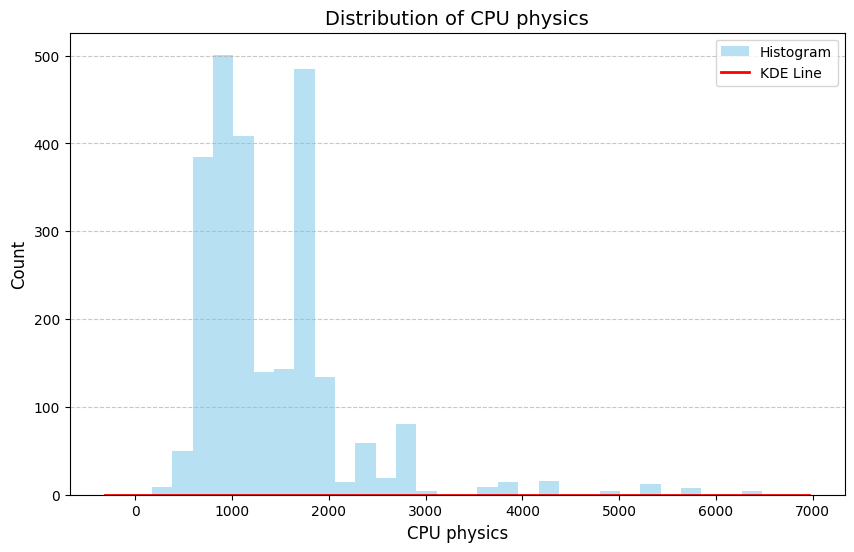

In [50]:
plt.figure(figsize=(10, 6))
plt.hist(X['cpu_specs_physics'], bins=30, color='skyblue', alpha=0.6, label='Histogram')

# Add line distribution (Kernel Density Estimation)
sns.kdeplot(X['cpu_specs_physics'], color='red', linewidth=2, label='KDE Line')

# Add labels and title
plt.xlabel('CPU physics', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of CPU physics', fontsize=14)
plt.legend()

# Display grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

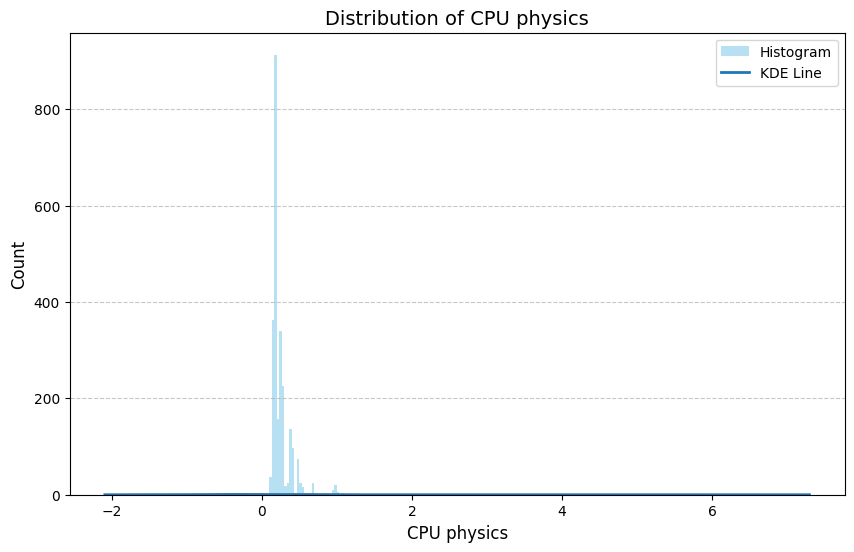

In [51]:
test18 = pd.DataFrame((scaler.fit_transform((X['cpu_specs_physics'].to_frame()))) + 0.1)
plt.figure(figsize=(10, 6))
plt.hist(test15, bins=30, color='skyblue', alpha=0.6, label='Histogram')

# Add line distribution (Kernel Density Estimation)
sns.kdeplot(test18, color='red', linewidth=2, label='KDE Line')

# Add labels and title
plt.xlabel('CPU physics', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of CPU physics', fontsize=14)
plt.legend()

# Display grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

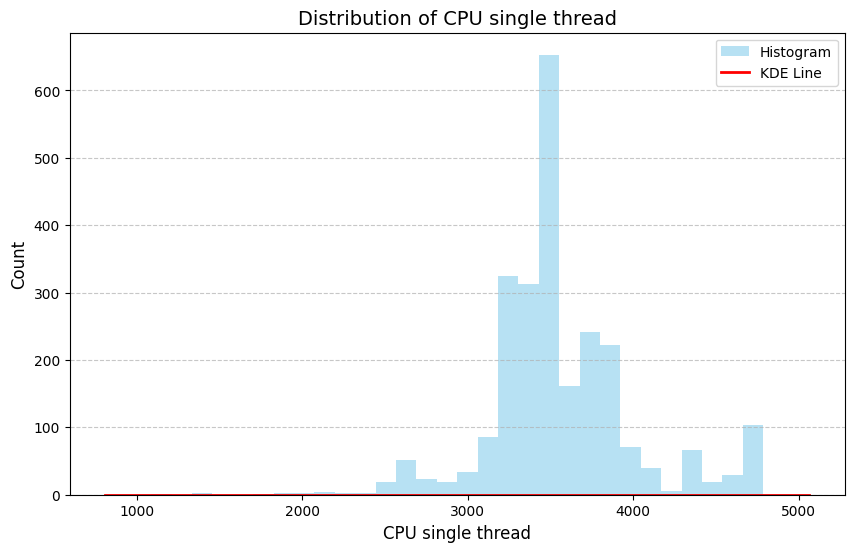

In [52]:
plt.figure(figsize=(10, 6))
plt.hist(X['cpu_specs_single_thread'], bins=30, color='skyblue', alpha=0.6, label='Histogram')

# Add line distribution (Kernel Density Estimation)
sns.kdeplot(X['cpu_specs_single_thread'], color='red', linewidth=2, label='KDE Line')

# Add labels and title
plt.xlabel('CPU single thread', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of CPU single thread', fontsize=14)
plt.legend()

# Display grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

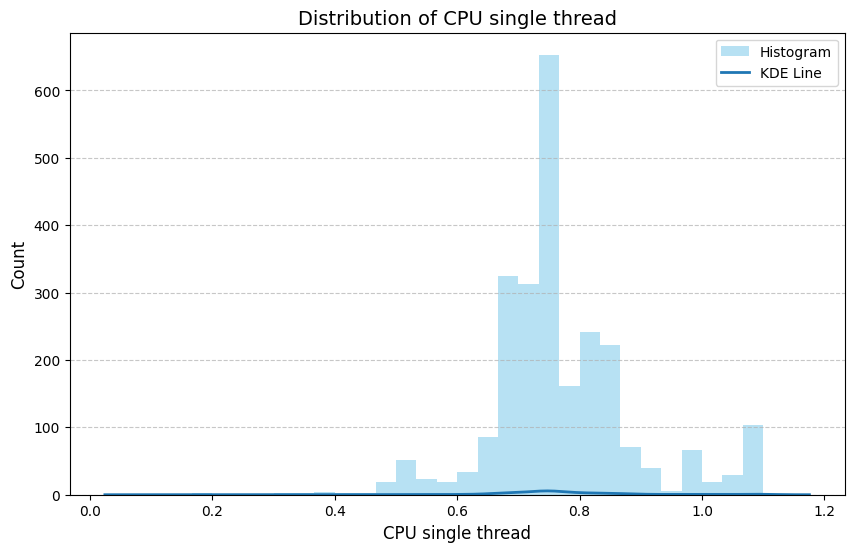

In [53]:
scaler = MinMaxScaler() 
test19 = pd.DataFrame((scaler.fit_transform((X['cpu_specs_single_thread'].to_frame()))) + 0.1)
plt.figure(figsize=(10, 6))
plt.hist(test19, bins=30, color='skyblue', alpha=0.6, label='Histogram')

# Add line distribution (Kernel Density Estimation)
sns.kdeplot(test19, color='red', linewidth=2, label='KDE Line')

# Add labels and title
plt.xlabel('CPU single thread', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of CPU single thread', fontsize=14)
plt.legend()

# Display grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

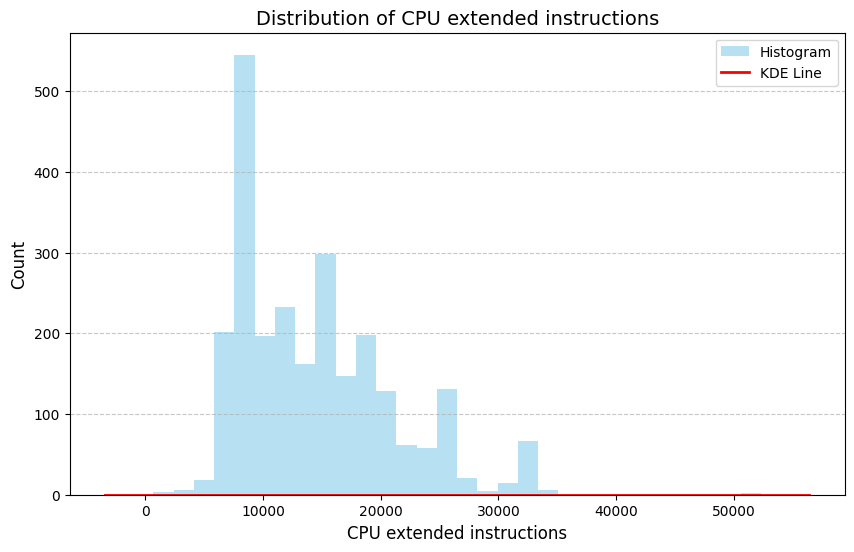

In [54]:
plt.figure(figsize=(10, 6))
plt.hist(X['cpu_specs_extended_instructions'], bins=30, color='skyblue', alpha=0.6, label='Histogram')

# Add line distribution (Kernel Density Estimation)
sns.kdeplot(X['cpu_specs_extended_instructions'], color='red', linewidth=2, label='KDE Line')

# Add labels and title
plt.xlabel('CPU extended instructions', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of CPU extended instructions', fontsize=14)
plt.legend()

# Display grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

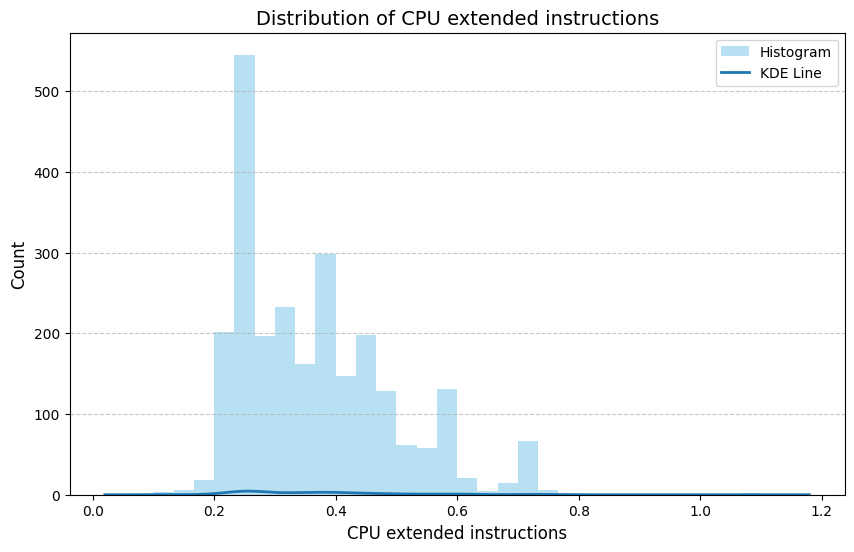

In [55]:
test20 = pd.DataFrame((scaler.fit_transform((X['cpu_specs_extended_instructions'].to_frame()))) + 0.1)
plt.figure(figsize=(10, 6))
plt.hist(test20, bins=30, color='skyblue', alpha=0.6, label='Histogram')

# Add line distribution (Kernel Density Estimation)
sns.kdeplot(test20, color='red', linewidth=2, label='KDE Line')

# Add labels and title
plt.xlabel('CPU extended instructions', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of CPU extended instructions', fontsize=14)
plt.legend()

# Display grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

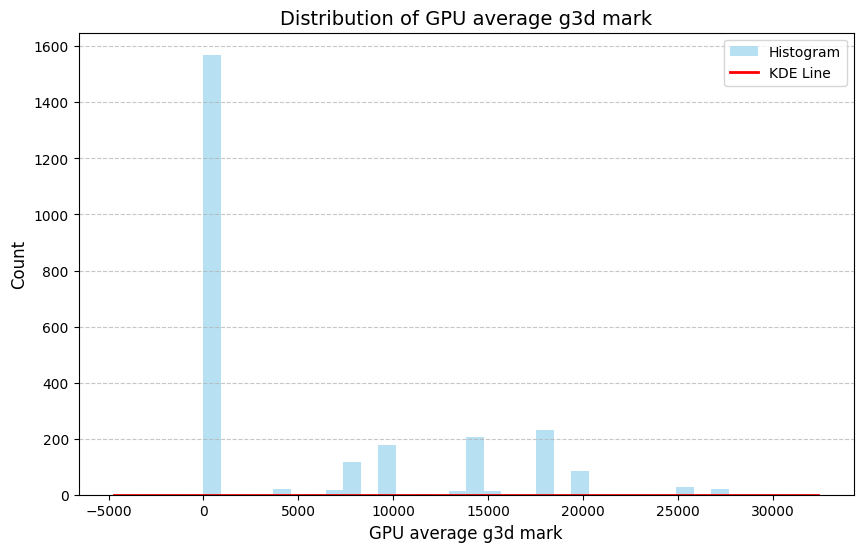

In [56]:
plt.figure(figsize=(10, 6))
plt.hist(X['gpu_specs_avg_g3d_mark'], bins=30, color='skyblue', alpha=0.6, label='Histogram')

# Add line distribution (Kernel Density Estimation)
sns.kdeplot(X['gpu_specs_avg_g3d_mark'], color='red', linewidth=2, label='KDE Line')

# Add labels and title
plt.xlabel('GPU average g3d mark', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of GPU average g3d mark', fontsize=14)
plt.legend()

# Display grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

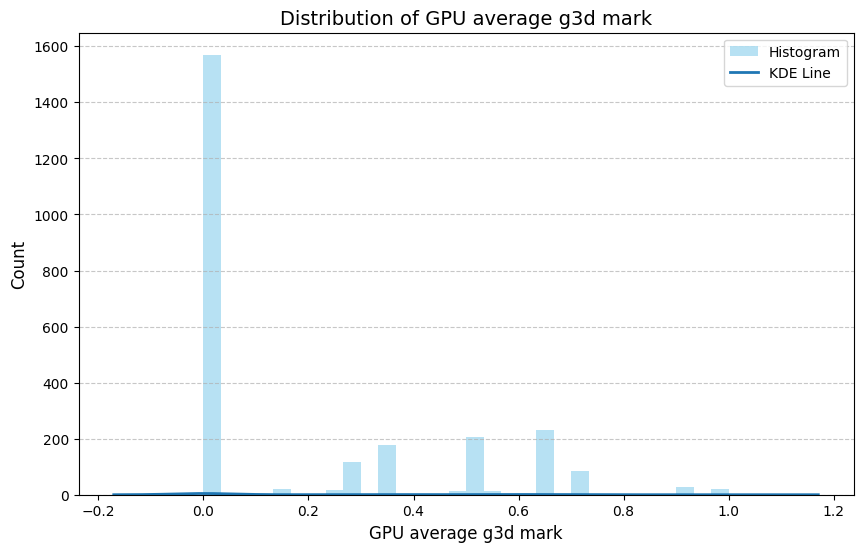

In [57]:
scaler = MinMaxScaler()
test21 = pd.DataFrame((scaler.fit_transform((X['gpu_specs_avg_g3d_mark'].to_frame()))))
plt.figure(figsize=(10, 6))
plt.hist(test21, bins=30, color='skyblue', alpha=0.6, label='Histogram')

# Add line distribution (Kernel Density Estimation)
sns.kdeplot(test21, color='red', linewidth=2, label='KDE Line')

# Add labels and title
plt.xlabel('GPU average g3d mark', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of GPU average g3d mark', fontsize=14)
plt.legend()

# Display grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

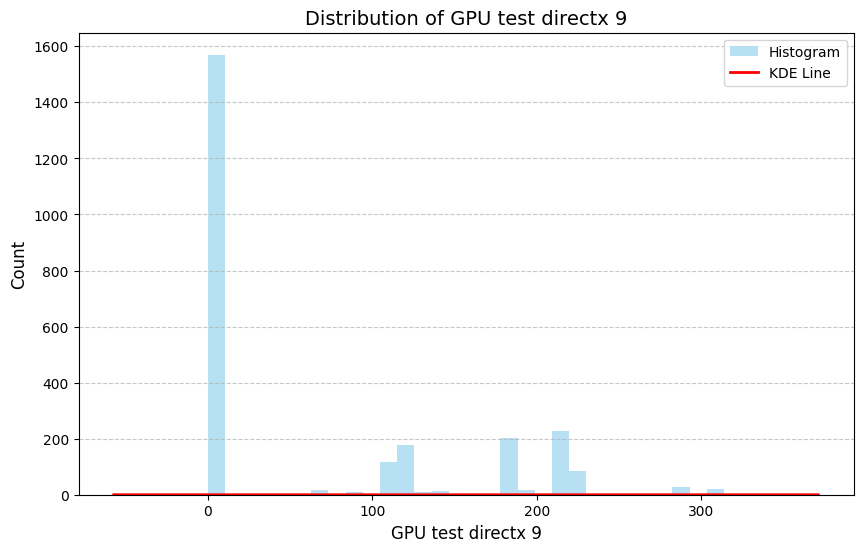

In [58]:
plt.figure(figsize=(10, 6))
plt.hist(X['gpu_specs_test_directx_9'], bins=30, color='skyblue', alpha=0.6, label='Histogram')

# Add line distribution (Kernel Density Estimation)
sns.kdeplot(X['gpu_specs_test_directx_9'], color='red', linewidth=2, label='KDE Line')

# Add labels and title
plt.xlabel('GPU test directx 9', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of GPU test directx 9', fontsize=14)
plt.legend()

# Display grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

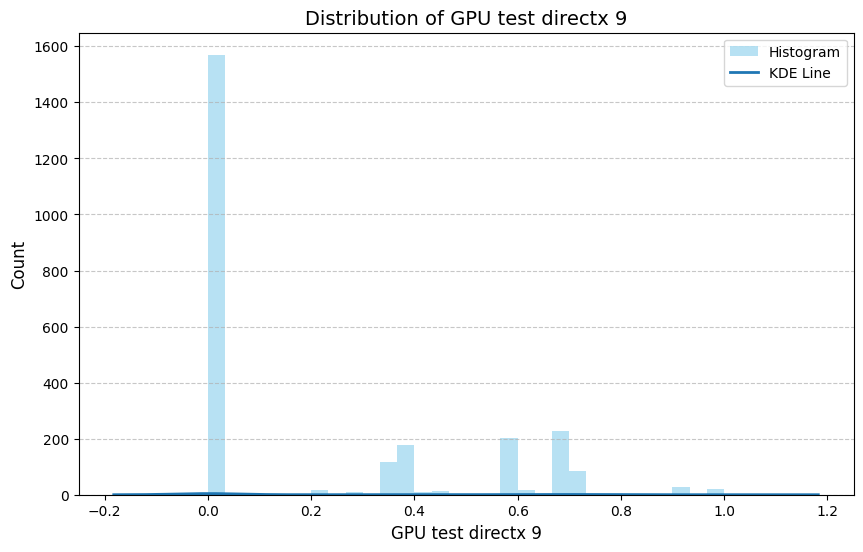

In [59]:
scaler = MinMaxScaler()
test22 = pd.DataFrame((scaler.fit_transform((X['gpu_specs_test_directx_9'].to_frame()))))
plt.figure(figsize=(10, 6))
plt.hist(test22, bins=30, color='skyblue', alpha=0.6, label='Histogram')

# Add line distribution (Kernel Density Estimation)
sns.kdeplot(test22, color='red', linewidth=2, label='KDE Line')

# Add labels and title
plt.xlabel('GPU test directx 9', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of GPU test directx 9', fontsize=14)
plt.legend()

# Display grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

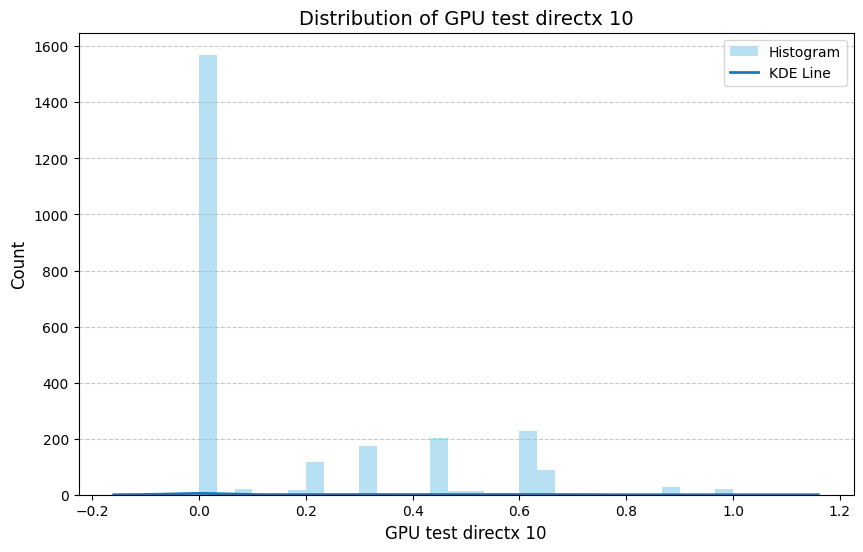

In [60]:
scaler = MinMaxScaler()
test23 = pd.DataFrame((scaler.fit_transform((X['gpu_specs_test_directx_10'].to_frame()))))
plt.figure(figsize=(10, 6))
plt.hist(test23, bins=30, color='skyblue', alpha=0.6, label='Histogram')

# Add line distribution (Kernel Density Estimation)
sns.kdeplot(test23, color='red', linewidth=2, label='KDE Line')

# Add labels and title
plt.xlabel('GPU test directx 10', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of GPU test directx 10', fontsize=14)
plt.legend()

# Display grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

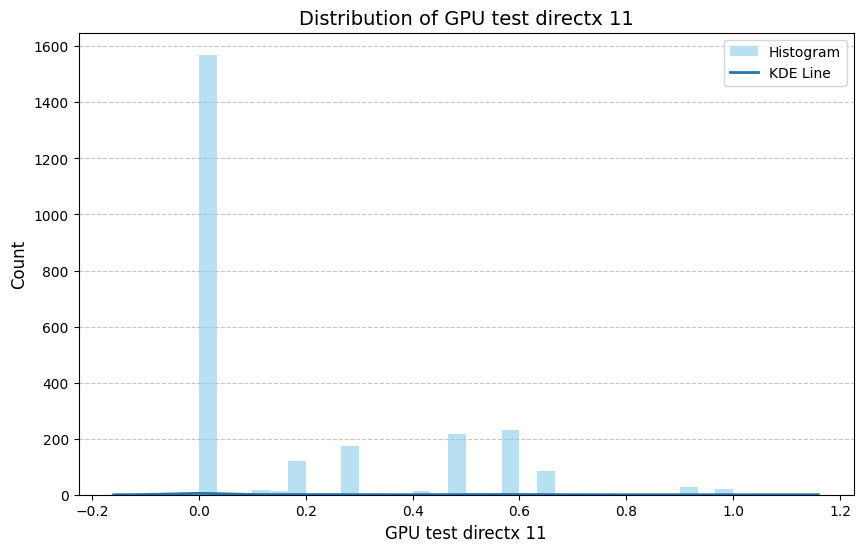

In [62]:
test24 = pd.DataFrame((scaler.fit_transform((X['gpu_specs_test_directx_11'].to_frame()))))
plt.figure(figsize=(10, 6))
plt.hist(test24, bins=30, color='skyblue', alpha=0.6, label='Histogram')

# Add line distribution (Kernel Density Estimation)
sns.kdeplot(test24, color='red', linewidth=2, label='KDE Line')

# Add labels and title
plt.xlabel('GPU test directx 11', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of GPU test directx 11', fontsize=14)
plt.legend()

# Display grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

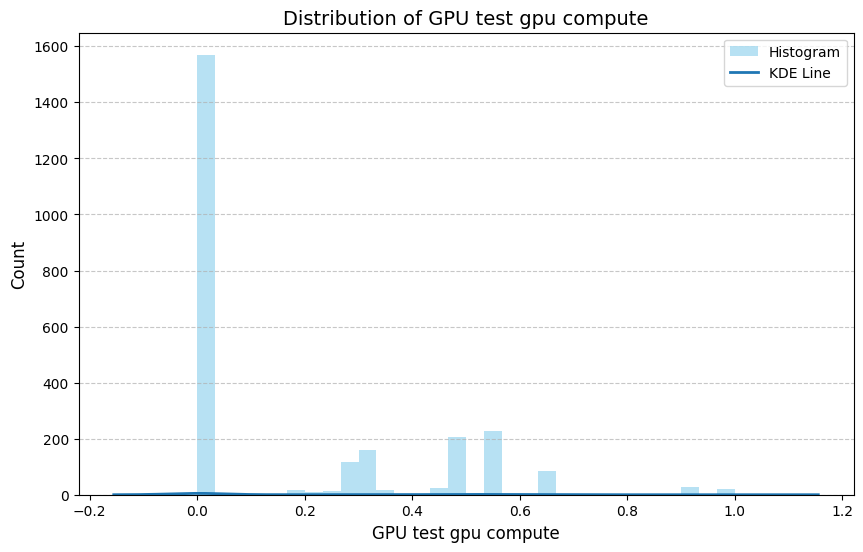

In [65]:
test25 = pd.DataFrame((scaler.fit_transform((X['gpu_specs_test_gpu_compute'].to_frame()))))
plt.figure(figsize=(10, 6))
plt.hist(test25, bins=30, color='skyblue', alpha=0.6, label='Histogram')

# Add line distribution (Kernel Density Estimation)
sns.kdeplot(test25, color='red', linewidth=2, label='KDE Line')

# Add labels and title
plt.xlabel('GPU test gpu compute', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of GPU test gpu compute', fontsize=14)
plt.legend()

# Display grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [66]:
X['category'].value_counts()

category
1    2339
0     161
Name: count, dtype: int64

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
def normalize(data: pd.DataFrame) -> pd.DataFrame: 
    data = data.drop(['screen_area', 'screen_ratio', 'gpu_specs_test_directx_9', 'gpu_specs_test_directx_11', 'gpu_specs_test_directx_12'], axis=1)
    def encode_with_nearest(value):
        if value in categories:
            return categories[value]
        else:
            nearest_key = min(categories.keys(), key=lambda k: abs(k - value))
            return categories[nearest_key]
    
    categories = {
        4.0: 0,
        8.0: 1,
        12.0: 2,
        16.0: 4,
        18.0: 5,
        24.0: 6,
        32.0: 7,
        48.0: 8,
        96.0: 9,
        }

    data['laptop_specs_ram_amount'] = data['laptop_specs_ram_amount'].apply(encode_with_nearest)

    categories ={
        256.0: 0,
        512.0: 1,
        1024.0: 2,
        2048.0: 3
    }
    data['laptop_specs_storage_amount'] = data['laptop_specs_storage_amount'].apply(encode_with_nearest)

    categories = {
        12.0: 0, 
        18.0: 1,
        24.0: 2, 
        36.0: 3
        }
    data['laptop_specs_warranty'] = data['laptop_specs_warranty'].apply(encode_with_nearest)

    categories = {
        60.0: 0, 
        90.0: 1,
        120.0: 2, 
        144.0: 3, 
        165.0: 4, 
        180.0: 5, 
        240.0: 6, 
        360.0:7
    }
    data['laptop_specs_screen_refresh_rate'] = data['laptop_specs_screen_refresh_rate'].apply(encode_with_nearest)

    data['laptop_specs_screen_size'] = data['laptop_specs_screen_size']/15.6
    data['laptop_specs_battery_cells'] = data['laptop_specs_battery_cells']/3

    scaler = MinMaxScaler()

    data['laptop_specs_screen_brightness'] = scaler.fit_transform(data['laptop_specs_screen_brightness'].to_frame()) + 0.1
    data['laptop_specs_battery_capacity'] = scaler.fit_transform(data['laptop_specs_battery_capacity'].to_frame()) + 0.1
    data['cpu_specs_multithread_rating'] = scaler.fit_transform(data['cpu_specs_multithread_rating'].to_frame()) + 0.1
    data['cpu_specs_single_thread_rating'] = scaler.fit_transform(data['cpu_specs_single_thread_rating'].to_frame()) + 0.1
    data['cpu_specs_data_compression'] = scaler.fit_transform(data['cpu_specs_data_compression'].to_frame()) + 0.1
    data['cpu_specs_integer_math'] = scaler.fit_transform(data['cpu_specs_integer_math'].to_frame()) + 0.1
    data['cpu_specs_floating_point_math'] = scaler.fit_transform(data['cpu_specs_floating_point_math'].to_frame()) + 0.1
    data['cpu_specs_find_prime_numbers'] = scaler.fit_transform(data['cpu_specs_find_prime_numbers'].to_frame()) + 0.1
    data['cpu_specs_random_string_sorting'] = scaler.fit_transform(data['cpu_specs_random_string_sorting'].to_frame()) + 0.1
    data['cpu_specs_data_encryption'] = scaler.fit_transform(data['cpu_specs_data_encryption'].to_frame()) + 0.1
    data['cpu_specs_physics'] = scaler.fit_transform(data['cpu_specs_physics'].to_frame()) + 0.1
    data['cpu_specs_single_thread'] = scaler.fit_transform(data['cpu_specs_single_thread'].to_frame()) + 0.1
    data['cpu_specs_extended_instructions'] = scaler.fit_transform(data['cpu_specs_extended_instructions'].to_frame()) + 0.1
    data['gpu_specs_avg_g3d_mark'] = scaler.fit_transform(data['gpu_specs_avg_g3d_mark'].to_frame())
    data['gpu_specs_test_directx_10'] = scaler.fit_transform(data['gpu_specs_test_directx_10'].to_frame())
    data['gpu_specs_test_gpu_compute'] = scaler.fit_transform(data['gpu_specs_test_gpu_compute'].to_frame())

    return data

data = pd.read_csv('/home/quangminh/Documents/code/Python/ProjectDS/laptop-price-prediction-ds-prj/train_processed.csv')
X = data.drop('laptop_specs_price', axis=1)
normalize(X).describe()

,laptop_specs_brand,laptop_specs_ram_amount,laptop_specs_ram_type,laptop_specs_storage_amount,laptop_specs_storage_type,laptop_specs_webcam_resolution,laptop_specs_screen_size,laptop_specs_screen_refresh_rate,laptop_specs_screen_brightness,laptop_specs_battery_capacity,...,cpu_specs_random_string_sorting,cpu_specs_data_encryption,cpu_specs_data_compression,cpu_specs_physics,cpu_specs_extended_instructions,cpu_specs_single_thread,gpu_specs_avg_g3d_mark,gpu_specs_test_directx_10,gpu_specs_test_gpu_compute,category
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,...,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,4.432000,3.555200,0.371200,1.036000,1.821600,0.937600,0.964478,2.254800,0.237289,0.418372,...,0.413881,0.415545,0.423168,0.292423,0.368336,0.770583,0.190717,0.173271,0.172381,0.935600
std,3.776226,2.026572,0.699147,0.670286,0.706239,0.241929,0.063926,1.759976,0.118712,0.184482,...,0.149669,0.141346,0.151057,0.122983,0.127365,0.120503,0.272152,0.254414,0.247439,0.245513
min,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.743590,0.000000,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.897436,1.000000,0.130612,0.288889,...,0.293796,0.314519,0.302046,0.209120,0.264338,0.719794,0.000000,0.000000,0.000000,1.000000
50%,3.000000,4.000000,0.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.181633,0.366667,...,0.366909,0.375718,0.388219,0.249088,0.353087,0.753597,0.000000,0.000000,0.000000,1.000000
75%,8.000000,4.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.283673,0.544444,...,0.465314,0.469102,0.485465,0.350753,0.435362,0.823094,0.341839,0.303867,0.305461,1.000000
max,16.000000,9.000000,1.000000,3.000000,2.000000,1.000000,1.153846,7.000000,1.100000,1.100000,...,1.100000,1.100000,1.100000,1.100000,1.100000,1.100000,1.000000,1.000000,1.000000,1.000000
